In [4]:
import numpy as np
import pandas as pd
from pandas_datareader import data as web
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
plt.rc('lines', color='k')
plt.rc('axes', edgecolor='k')

def day_return(ticker, date):
    data = web.DataReader(ticker, data_source='yahoo', start=date)['Adj Close'].to_frame()
    
    data['Date'] = data.index
    data['Date'] = pd.to_datetime(data['Date'])
    data['Weekday'] = data['Date'].dt.day_name()
    data['Return'] = ((data['Adj Close']-data['Adj Close'].shift())/data['Adj Close'])*100
    
    intermediary = {'Date': data['Date'], 'Weekday': data['Weekday'], 'Return %': data['Return']}
    frame = pd.DataFrame(intermediary, columns = ['Date', 'Weekday', 'Return %'])
    
    result = frame.groupby('Weekday', as_index=False)['Return %'].mean()
    result['Return %'] = round(result['Return %'],3)
    
    max_result = frame.groupby('Weekday', as_index=False)['Return %'].max()
    result['Maximum'] = round(max_result['Return %'],3)
    
    min_result = frame.groupby('Weekday', as_index=False)['Return %'].min()
    result['Minimum'] = round(min_result['Return %'],3)
    
    #std_result = pd.DataFrame.std(frame.groupby('Weekday', as_index=False)['Return %'])
    #std_result = pd.DataFrame.std(float(std_result))
    #result['Standard Deviation'] = round(std_result['Return %'],3)
    result = result.reindex([1, 3, 4, 2, 0])
    return(result)

#use date format 'YYYY-MM-DD' 

def weekday_analysis(ticker, date):
    day_data = day_return(ticker, date)
    print(day_data)
    plt.figure()
    plt.bar(np.array(day_data['Weekday']), np.array(day_data['Return %']), width=0.25, color = 'b')
    plt.hlines(0, -0.2,4.25)
    plt.ylabel('Average Daily Percentage')
    plt.xlabel('Day of the Week')
    plt.plot()
    plt.figure()
    plt.bar(np.array(day_data['Weekday']), np.array(day_data['Maximum']), width=0.25, color = 'g')
    plt.bar(np.array(day_data['Weekday']), np.array(day_data['Minimum']), width=0.25, color = 'r')
    plt.hlines(0, -0.2,4.25)
    plt.ylabel('Maximum Daily Rise/Fall Percentage')
    plt.xlabel('Day of the Week')
    plt.plot()

     Weekday  Return %  Maximum  Minimum
1     Monday    -0.019   10.378  -13.616
3    Tuesday     0.054    9.738   -6.089
4  Wednesday     0.012    5.422   -9.932
2   Thursday     0.021    6.473  -10.511
0     Friday    -0.004    8.498   -4.532


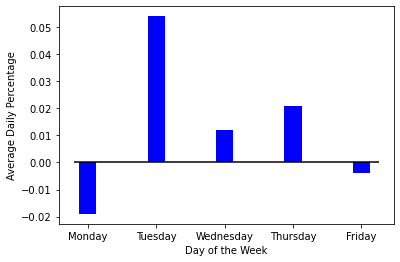

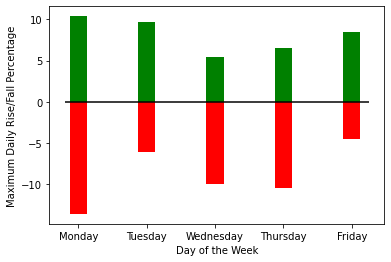

In [9]:
weekday_analysis('^GSPC', '2000-05-01')